<a href="https://colab.research.google.com/github/monicafar147/classification-predict-streamlit-template/blob/Preprocessing/climate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

## Installing comet

In [1]:
!pip install comet_ml

     |████████████████████████████████| 215kB 2.8MB/s 
     |████████████████████████████████| 419kB 8.6MB/s 
     |████████████████████████████████| 204kB 14.2MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=7bc24efc721f4bad005dea82f1059434d2154132a21eb4b434acbdb1ffff2309
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [1]:
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="rBqQ3hDuEa6xVpT9ns5Tz1dVt",
                        project_name="nlp-climate-change",
                        workspace="monicafar147")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/monicafar147/nlp-climate-change/bec709f2c15d44b3883fac82d10b816e



## Importing the modules

In [2]:
import numpy as np 
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

# text preprocessing
import re
from string import punctuation
import nltk
nltk.download(['stopwords','punkt'])
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word
from wordcloud import WordCloud, STOPWORDS

# models
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Importing the data

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/monicafar147/classification-predict-streamlit-template/master/climate-change-belief-analysis/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/monicafar147/classification-predict-streamlit-template/master/climate-change-belief-analysis/test.csv")

In [4]:
print("Train\n")
print(train.head(5))
print("\nTest")
print(test.head(5))

Train

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

Test
                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


# EDA

First we see if there are any repeats or Null values in the dataset


In [5]:
# Checking that there is no repeats in the Data

unique = [i for i in train['tweetid'].unique()]
print("Number of unique values")
print(train['tweetid'].nunique())
print("\nTotal number of values")
print(len(train['tweetid']))
print("\nNumber of null values:\n" + str(train.isnull().sum()))

Number of unique values
15819

Total number of values
15819

Number of null values:
sentiment    0
message      0
tweetid      0
dtype: int64


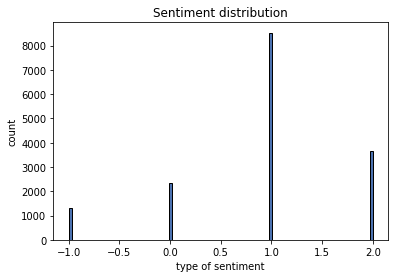

In [6]:
# We plot a graph to see the sentiment distribution
plt.hist(train['sentiment'], bins = 100, edgecolor = 'k')
plt.xlabel('type of sentiment')
plt.ylabel('count')
plt.title('Sentiment distribution')
plt.show()

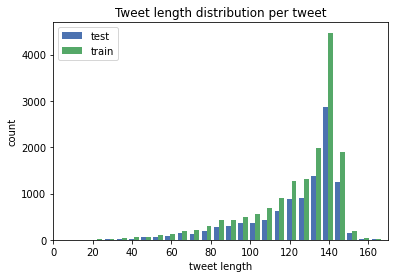

In [7]:
# Explore the word count and tweet lengths
train['length'] = train['message'].astype(str).apply(len)
train['word_count'] = train['message'].apply(lambda x: len(str(x).split()))
test['length'] = test['message'].astype(str).apply(len)
test['word_count'] = test['message'].apply(lambda x: len(str(x).split()))

# Creating the plot
plt.hist([test['length'], train['length']], bins=100, label=['test', 'train'])
plt.title('Tweet length distribution per tweet')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,170])
plt.show()

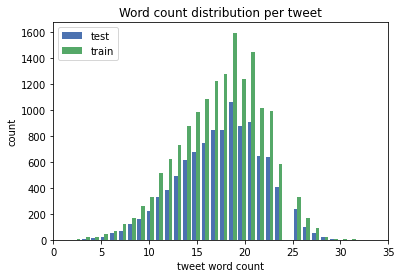

In [8]:
plt.hist([test['word_count'], train['word_count']], bins=100, label=['test', 'train'])
plt.title('Word count distribution per tweet')
plt.xlabel('tweet word count')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,35])
plt.show()

Word cloud to see what the most popular words are in the dataset so we can better understand the data

In [9]:
train['sentiment'].value_counts(normalize=True)

 1    0.539225
 2    0.230103
 0    0.148745
-1    0.081927
Name: sentiment, dtype: float64

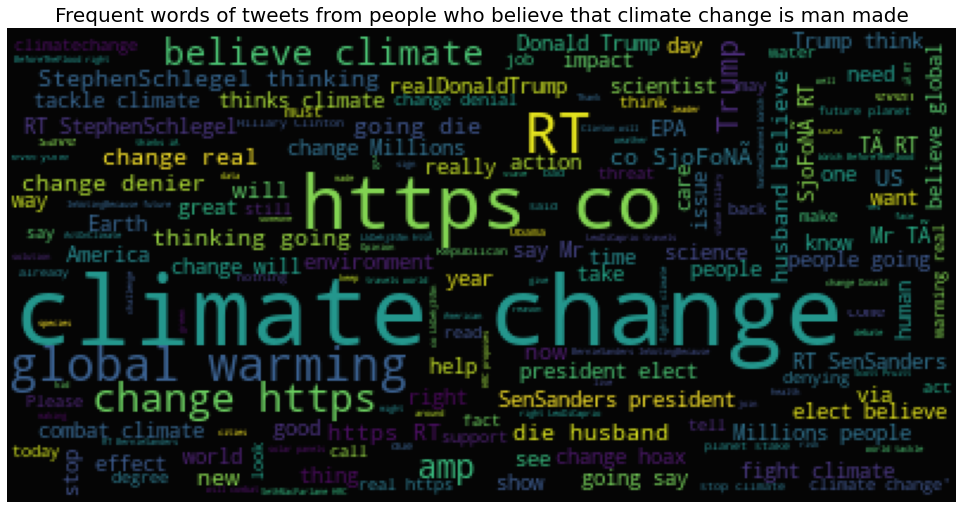

In [10]:
rnd_comments = train[train['sentiment']==1].sample(n=2000)['message'].values
wc = WordCloud(background_color='black', max_words=2000, stopwords=STOPWORDS)
wc.generate(''.join(rnd_comments))

plt.figure(figsize=(17,10))
plt.axis('off')
plt.title('Frequent words of tweets from people who believe that climate change is man made', fontsize=20)
plt.imshow(wc.recolor(colormap='viridis', random_state=17), alpha=0.98)
plt.show()

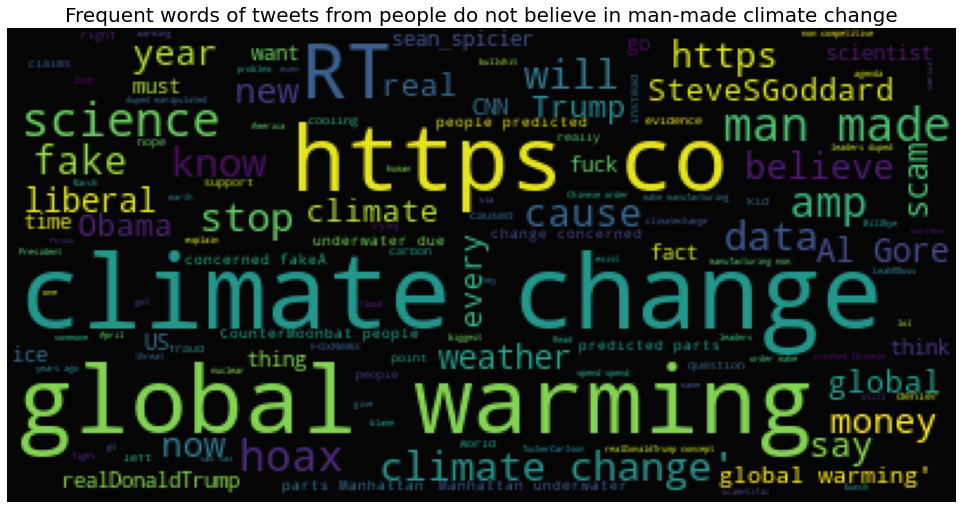

In [11]:
rnd_comment = train[train['sentiment']==-1].sample(n=200)['message'].values
wc = WordCloud(background_color='black', max_words=2000, stopwords=STOPWORDS)
wc.generate(''.join(rnd_comment))

plt.figure(figsize=(17,10))
plt.axis('off')
plt.title('Frequent words of tweets from people do not believe in man-made climate change', fontsize=20)
plt.imshow(wc.recolor(colormap='viridis', random_state=17), alpha=0.98)
plt.show()

# Data preprocessing
Combine the train and test data in order to do preprocessing on both datasets. This is essential to test the models being built. This step will also be useful for implementing the API.

Before preprocessing we need to ask ourseleves the following questions about this data:
1. does URL have impact on tweet sentiment?
2. does retweet have any impact on tweet sentiment?
3. does removing hashtags remove sentment?
4. contractions are a problem - removing doesn't -> does




Creating a function which will preprocess all of our data.


In [12]:
def preprocess(tweet):
  tweet = tweet.lower()
  tweet = re.sub(r"\W", " ", tweet)
  tweet = re.sub(r'#([^\s]+)', r'\1', tweet) 
  tweet = word_tokenize(tweet)
  stopwords_list = set(stopwords.words('english') + list(punctuation))
  tweets = [word for word in tweet if word not in stopwords_list]
  return " ".join(tweet)

In [13]:
# Splitting the labels and features
train['processed'] = train['message'].apply(preprocess)
X = train['processed']
y = train['sentiment']

In [14]:
# print out cleaned text
index = 1
for tweet in X[0:10]:
    print(str(index)+": " + tweet)
    print('\n')
    index += 1

1: polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what https t co yelvcefxkc via mashable


2: it s not like we lack evidence of anthropogenic global warming


3: rt rawstory researchers say we have three years to act on climate change before it s too late https t co wdt0kdur2f https t co z0anpt


4: todayinmaker wired 2016 was a pivotal year in the war on climate change https t co 44wotxtlcd


5: rt soynoviodetodas it s 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight


6: worth a read whether you do or don t believe in climate change https t co gglzvnyjun https t co 7afe2mah8j


7: rt thenation mike pence doesn t believe in global warming or that smoking causes lung cancer https t co gvwyaauu8r


8: rt makeandmendlife six big things we can all do today to fight climate change or how to be a climate activistã â â https t co tymlu6dbnm hã â â


9: aceofspadeshq my 8yo nephew is inconsolable he want

At this point the text is clean, preprocessed and ready to be modelled.


In [15]:
# preprocess testing data
test['processed'] = test['message'].apply(preprocess)

# Data EDA after Pre-processing

In [16]:
# explore the word count and tweet lengths
train['length after'] = train['processed'].astype(str).apply(len)
train['word_count after'] = train['processed'].apply(lambda x: len(str(x).split()))
test['length after'] = test['processed'].astype(str).apply(len)
test['word_count after'] = test['processed'].apply(lambda x: len(str(x).split()))

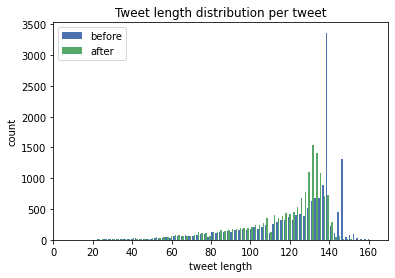

In [17]:
plt.hist([train['length'], train['length after']], bins=100, label=['before', 'after'])
plt.title('Tweet length distribution per tweet')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,170])
plt.show()

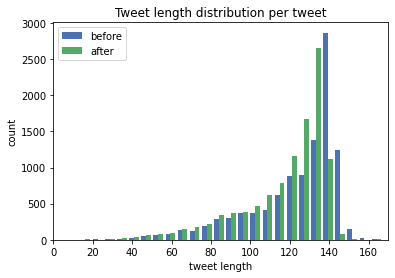

In [18]:
plt.hist([test['length'], test['length after']], bins=100, label=['before', 'after'])
plt.title('Tweet length distribution per tweet')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,170])
plt.show()

In [ ]:
# frequency of commonly used words.

# Modelling


## Splitting the Dataset

In [19]:
from sklearn.model_selection import train_test_split

# Splitting the labels and fetures into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [ ]:
# plot train vs test

## Declare models

In [20]:
# apply model on train data using Linear SVC:
svc = Pipeline([('tfidf',TfidfVectorizer()),('classify',LinearSVC())])
svc.fit(X_train, y_train)

#apply model on test data
y_pred = svc.predict(X_test)

## Predicting

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
report_1 = print(classification_report(y_test, y_pred))
report_1

              precision    recall  f1-score   support

          -1       0.67      0.52      0.59       126
           0       0.66      0.42      0.52       224
           1       0.80      0.86      0.83       895
           2       0.75      0.83      0.79       337

    accuracy                           0.77      1582
   macro avg       0.72      0.66      0.68      1582
weighted avg       0.76      0.77      0.76      1582



In [24]:
x_unseen = test['processed']
y_prediction = svc.predict(x_unseen)

# Saving the prediction to submit

In [26]:
Final = test['tweetid']

Final_Table = {'tweetid': Final, 'sentiment':np.round(y_prediction, 0)}
submission = pd.DataFrame(data=Final_Table)
submission = submission[['tweetid', 'sentiment']]


submission.set_index('tweetid')

,sentiment
tweetid,
169760,1
35326,1
224985,1
476263,1
872928,0
...,...
895714,1
875167,1
78329,2


In [27]:
# Only run this code if wanting to save to a CSV file
# save to .csv file
#submission.to_csv("kaggle_mon.csv",index  = False)

# Comet version control

In [28]:
print("\nResults\nConfusion matrix \n {}".format(
    confusion_matrix(y_test, y_pred)))


Results
Confusion matrix 
 [[ 66  13  41   6]
 [ 12  95 103  14]
 [ 17  33 774  71]
 [  4   3  51 279]]


In [33]:
report = classification_report(y_test, y_pred)
print("\nResults\nClassification report \n {}".format(
    report))


Results
Classification report 
               precision    recall  f1-score   support

          -1       0.67      0.52      0.59       126
           0       0.66      0.42      0.52       224
           1       0.80      0.86      0.83       895
           2       0.75      0.83      0.79       337

    accuracy                           0.77      1582
   macro avg       0.72      0.66      0.68      1582
weighted avg       0.76      0.77      0.76      1582



In [34]:
# Create dictionaries for the data we want to log

params = {"preprocessing":  "_preprocess_V4(df)",
          "keeps username":"True",
          "keeps hashtags":"True",
          "keeps URL":"urlweb",
          "removes puncutation":"string punctuation",
          "use stopwords":"False",
          "model_type": "LinearSVC",
          }

metrics = {"report" : report,
           }

In [35]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metric("report",report)

In [36]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/monicafar147/nlp-climate-change/bec709f2c15d44b3883fac82d10b816e
COMET INFO:   Metrics:
COMET INFO:     report :               precision    recall  f1-score   support

          -1       0.67      0.52      0.59       126
           0       0.66      0.42      0.52       224
           1       0.80      0.86      0.83       895
           2       0.75      0.83      0.79       337

    accuracy                           0.77      1582
   macro avg       0.72      0.66      0.68      1582
weighted avg       0.76      0.77      0.76      1582

COMET INFO:   Parameters:
COMET INFO:     classify_C                 : 1.0
COMET INFO:     classify_class_weight      : 1
COMET INFO:     classify_dual              : True
COMET INFO:     classify_fit_intercep